In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

In [6]:
df = pd.read_csv('./resources/spam.tsv', sep='\t')

In [7]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [10]:
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

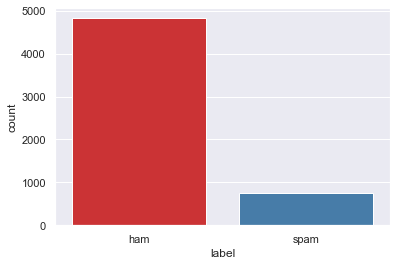

In [29]:
sns.countplot(x = df.label,palette="Set1")

##### Now this leads to imbalanced classification

In [32]:
spam = df[df['label']=='spam']
# spam.head()
# --------------
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [36]:
ham = ham.sample(spam.shape[0])
ham.shape

(747, 4)

In [37]:
data = ham.append(spam, ignore_index=True)
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


<hr><h3>EDA</h3>

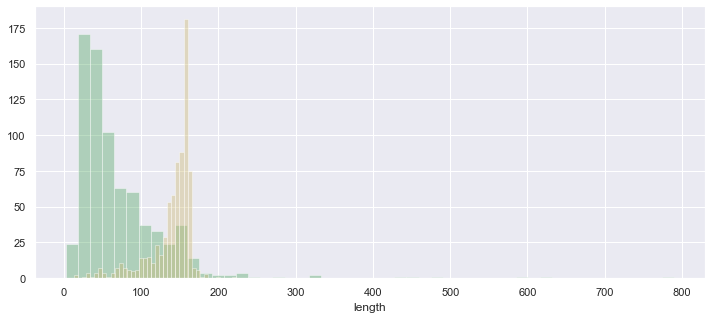

In [64]:
sns.distplot(data[data['label']=='ham']['length'],kde=False,color="g")
sns.distplot(data[data['label']=='spam']['length'],kde=False,color="y")
sns.set(rc={'figure.figsize':(12,5)})

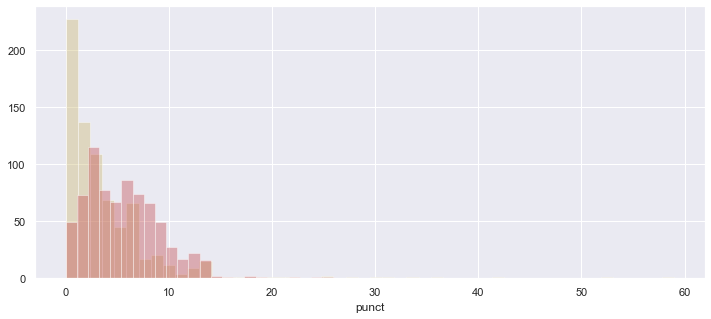

In [66]:
sns.distplot(data[data['label']=='ham']['punct'],kde=False,color="y")
sns.distplot(data[data['label']=='spam']['punct'],kde=False,color="r")
sns.set(rc={'figure.figsize':(12,5)})

<hr><h3>Encoding and Model</h3>

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3, random_state=0, shuffle = True, stratify=data['label'])

In [82]:
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)

In [83]:
vectorizer.get_feature_names()

['00',
 '000',
 '008704050406',
 '01223585334',
 '02',
 '0207',
 '02073162414',
 '02085076972',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07046744435',
 '07090201529',
 '07123456789',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '07781482378',
 '07786200117',
 '078',
 '07801543489',
 '07808',
 '07808726822',
 '07821230901',
 '078498',
 '0789xxxxxxx',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08006344447',
 '0808',
 '08081560665',
 '083',
 '0844',
 '08448350055',
 '0845',
 '08450542832',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08700469649',
 '08700621170150p',
 '08701213186',
 '08701237397',
 '08701417012150p',
 '087016248',
 '087018728737',
 '08702490080',
 '08702840625',
 '08704439680',
 '08706091795',
 '08707500020',
 '08707509020',
 '08707808226',
 '08708034412',
 '08708800282'

In [84]:
X_train_vect.shape

(1045, 3659)

In [85]:
X_train_vect

<1045x3659 sparse matrix of type '<class 'numpy.float64'>'
	with 17727 stored elements in Compressed Sparse Row format>

the above numbers represent that we have 1045 unique messages and 3659 is our vocabulary size

<hr><h3> Pipelining and RFC </h3>

In [118]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [119]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [120]:
y_pred = clf.predict(X_test)

In [121]:
confusion_matrix(y_test, y_pred)

array([[225,   0],
       [ 27, 197]], dtype=int64)

In [122]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.89      1.00      0.94       225
        spam       1.00      0.88      0.94       224

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [123]:
accuracy_score(y_test, y_pred)

0.9398663697104677

In [124]:
clf.predict(["Hey, whassup?"])

array(['ham'], dtype=object)

In [125]:
clf.predict(["you have got free tickets to the USA this summer."])

array(['ham'], dtype=object)

In [126]:
clf.predict(['Congratulations! You have won 300000 rupees in a lucky draw. Please reply your account details or call us at 8546378963 to avail the reward'])

array(['spam'], dtype=object)

<hr><h3>SVM</h3>

In [127]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C = 1000, gamma = 'auto'))])

In [128]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='aut

In [129]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[224,   1],
       [ 18, 206]], dtype=int64)

In [130]:
accuracy_score(y_test, y_pred)

0.9576837416481069

In [131]:
clf.predict(["Hey, whassup?"])

array(['ham'], dtype=object)

In [132]:
clf.predict(["you have got free tickets to the USA this summer."])

array(['spam'], dtype=object)